# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

## Part 2 - Importing the dataset

In [2]:
dataset = pd.read_excel('Dataset3.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_type        546 non-null    object 
 1   Charge_size        546 non-null    float64
 2   Standoff_distance  546 non-null    float64
 3   Incident_pressure  546 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.2+ KB


## Part 3 -  Preprocessing

### Convert categorical variable into dummy variables

In [3]:
dataset = pd.get_dummies(dataset, columns=['Charge_type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_size        546 non-null    float64
 1   Standoff_distance  546 non-null    float64
 2   Incident_pressure  546 non-null    float64
 3   Charge_type_CompB  546 non-null    uint8  
 4   Charge_type_TNT    546 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 14.0 KB


In [4]:
dataset.head()

,Charge_size,Standoff_distance,Incident_pressure,Charge_type_CompB,Charge_type_TNT
0,0.5,1.5,283.258,0,1
1,0.5,2.5,163.904,0,1
2,0.5,3.5,135.678,0,1
3,0.5,4.5,124.039,0,1
4,0.5,5.5,117.856,0,1


### Dividing the dataset into independent and depenedent varibales

In [5]:
y = dataset['Incident_pressure']
X = dataset.drop('Incident_pressure', axis=1)
print(X.shape, y.shape)

(546, 4) (546,)


### Convert to numpy array

In [6]:
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 4 - Building the ANN

### Initializing the ANN

In [8]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=200, input_shape=(X_train.shape[1],), activation='relu'))

### Adding the second hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=125, activation='relu'))

### Adding the third hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

### Adding the output layer

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

### Model summary

In [13]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1000      
                                                                 
 dense_1 (Dense)             (None, 125)               25125     
                                                                 
 dense_2 (Dense)             (None, 50)                6300      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 32,476
Trainable params: 32,476
Non-trainable params: 0
_________________________________________________________________


## Part 3 - Training the ANN

### Compiling the ANN

In [14]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mae'])

### Early stopping callback

In [15]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [16]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=500,
                    batch_size=60,
                    verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 30ms/step - loss: 1211788.8750 - mae: 384.6557 - val_loss: 473761.0312 - val_mae: 283.8758
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 1073757.6250 - mae: 432.8918 - val_loss: 456477.3750 - val_mae: 338.0714
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 999328.7500 - mae: 423.0504 - val_loss: 392519.6875 - val_mae: 260.4919
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 899468.6250 - mae: 372.9790 - val_loss: 343791.0938 - val_mae: 254.8393
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 741517.1875 - mae: 375.7284 - val_loss: 293944.5000 - val_mae: 215.8308
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 607524.7500 - mae: 280.2747 - val_loss: 216928.2500 - val_mae: 166.0848
Epoch 7/500
8/8 [==============================] - 0s 8ms/step - loss: 509210.8750 - mae: 278.8174 - val_loss: 172649.4844 - val_mae: 138.5

## Save the Model

## Part 4 - Evaulating predictions

### Predicting the results of the Test set

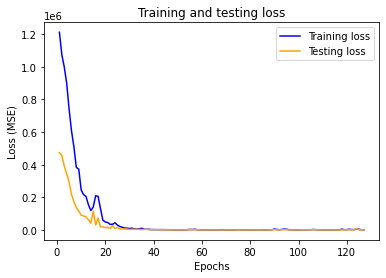

In [19]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Testing loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

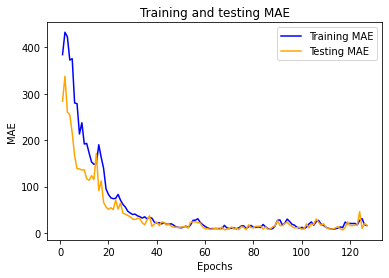

In [20]:
loss_values1 = history_dict['mae'] 
val_loss_values1 = history_dict['val_mae'] 
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Training MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Testing MAE')
plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [21]:
print (epochs)

range(1, 128)


### Scatterplot of actual vs. pred

4/4 [==============================] - 0s 2ms/step


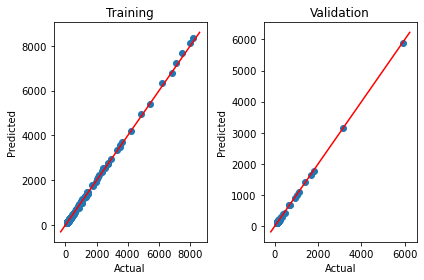

In [22]:
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=ann.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [23]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

4/4 [==============================] - 0s 3ms/step
[[ 125.08  126.21]
 [ 128.47  136.68]
 [ 683.5   697.97]
 [ 117.62  120.33]
 [ 907.44  908.62]
 [ 109.74  105.17]
 [ 288.84  292.65]
 [ 116.78  114.76]
 [ 121.71  122.15]
 [ 141.08  149.03]
 [ 143.62  151.21]
 [ 389.12  384.85]
 [ 118.44  122.44]
 [ 111.87  108.02]
 [ 109.52  104.34]
 [ 191.52  187.24]
 [ 173.82  180.92]
 [ 147.49  155.65]
 [ 200.99  218.53]
 [ 109.56  110.55]
 [1637.32 1649.83]
 [ 120.76  119.95]
 [ 121.56  120.34]
 [ 107.74  107.75]
 [ 659.93  647.73]
 [ 110.75  111.93]
 [ 223.57  242.76]
 [ 118.74  117.74]
 [ 126.11  133.28]
 [ 130.64  135.82]
 [ 223.    227.9 ]
 [ 143.21  148.37]
 [ 123.37  126.47]
 [ 119.35  116.61]
 [ 118.99  111.98]
 [ 120.62  120.63]
 [ 122.57  125.91]
 [ 122.39  123.56]
 [ 106.85  103.93]
 [ 289.77  305.53]
 [ 120.13  118.49]
 [ 108.82  104.99]
 [ 108.07  103.39]
 [ 109.61  106.75]
 [ 141.46  149.23]
 [ 131.45  130.47]
 [ 145.6   143.94]
 [ 117.02  124.59]
 [ 217.99  216.19]
 [ 115.89  111.05]

Text(0, 0.5, 'Predicted data')

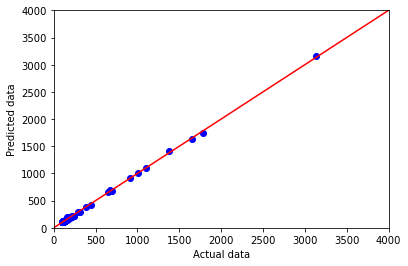

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,4000],[0,4000], color = "red")
plt.axis ([0,4000,0,4000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

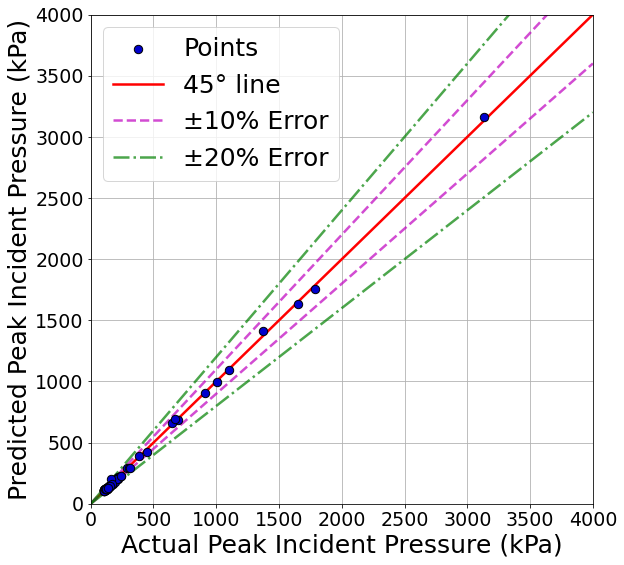

In [25]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,4000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 4000)
plt.xlim(0, 4000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

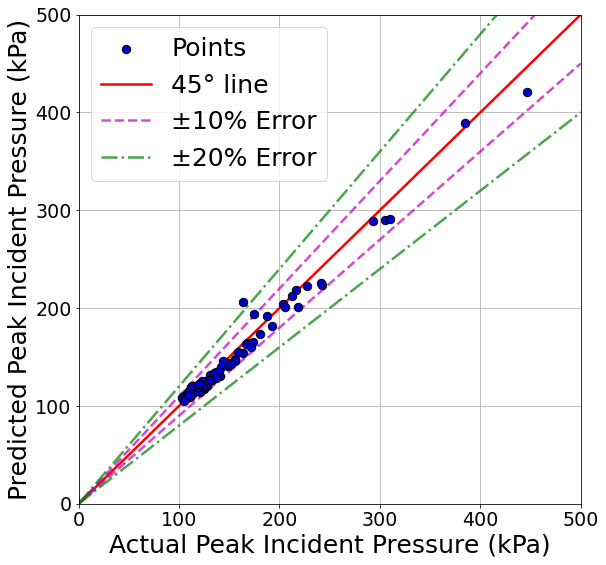

In [26]:
# Initialize layout
fig2, bx = plt.subplots(figsize = (9, 9))



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')




plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)



x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7) #\u00B1
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red


#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

### Performance Matrics

In [27]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

14/14 [==============================] - 0s 2ms/step
10.735671035346634
6.893364201771123


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9996936184617339


In [29]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9994579122912075


In [30]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 98.18%
Within 20% margin 99.09%
Out of 20% margin 0.91%


In [31]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9996819467840856


In [32]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

11.743754514704513

In [33]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

6.893364201771123

In [31]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

ModuleNotFoundError: No module named 'ann_visualizer'

## Part 5 - Contour plot visualization

In [34]:
print (X_test)

[[ 7.5 10.5  0.   1. ]
 [16.  11.   1.   0. ]
 [ 9.5  2.5  0.   1. ]
 [17.5 16.5  0.   1. ]
 [13.5  2.5  0.   1. ]
 [ 1.5 19.5  0.   1. ]
 [18.   5.   1.   0. ]
 [ 7.5 15.5  0.   1. ]
 [22.  17.   1.   0. ]
 [17.5  9.5  0.   1. ]
 [13.5  8.5  0.   1. ]
 [16.   4.   1.   0. ]
 [ 5.5 10.5  0.   1. ]
 [ 4.  20.   1.   0. ]
 [ 1.  20.   1.   0. ]
 [ 6.   5.   1.   0. ]
 [19.5  7.5  0.   1. ]
 [12.   8.   1.   0. ]
 [13.5  5.5  0.   1. ]
 [ 2.  13.   1.   0. ]
 [14.   2.   1.   0. ]
 [ 6.  12.   1.   0. ]
 [22.  18.   1.   0. ]
 [ 1.  13.   1.   0. ]
 [23.5  3.5  0.   1. ]
 [ 4.  15.   1.   0. ]
 [17.5  5.5  0.   1. ]
 [ 6.  13.   1.   0. ]
 [15.5 11.5  0.   1. ]
 [13.5 10.5  0.   1. ]
 [18.   6.   1.   0. ]
 [ 4.   6.   1.   0. ]
 [24.5 15.5  0.   1. ]
 [20.  20.   1.   0. ]
 [ 9.5 19.5  0.   1. ]
 [21.5 17.5  0.   1. ]
 [23.5 15.5  0.   1. ]
 [23.5 16.5  0.   1. ]
 [ 0.5 16.5  0.   1. ]
 [15.5  4.5  0.   1. ]
 [10.  15.   1.   0. ]
 [ 1.  18.   1.   0. ]
 [ 0.5 18.5  0.   1. ]
 [ 2.  18. 

In [35]:
print('number of dimensions :', X_test.ndim)

number of dimensions : 2


### Define the extents of the 2D space and the mesh size

In [36]:
start, stop, n_values = -4, 4, 800

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = np.sqrt(X**2 + Y**2)
print (Z.shape)

d = Z.reshape(-1)
d = d.reshape(len (d), 1)
print (d)
print (d.shape)

(800, 800)
[[5.66]
 [5.65]
 [5.64]
 ...
 [5.64]
 [5.65]
 [5.66]]
(640000, 1)


### Defining charge mass and charge type

In [37]:
m = np.repeat(20.2, len(d)).reshape(len(d),1)

print (m.shape)
print (m)

c = np.repeat(1, len(d)).reshape(len(d),1)
print (c.shape)
print (c)

t = np.repeat(0, len(d)).reshape(len(d),1)
print (t.shape)
print (t)

(640000, 1)
[[20.2]
 [20.2]
 [20.2]
 ...
 [20.2]
 [20.2]
 [20.2]]
(640000, 1)
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
(640000, 1)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


### Forming 2D array to predict peak incident pressure

In [38]:
arr = np.concatenate ((m, d, c, t), axis = 1)
print (arr)

[[20.2   5.66  1.    0.  ]
 [20.2   5.65  1.    0.  ]
 [20.2   5.64  1.    0.  ]
 ...
 [20.2   5.64  1.    0.  ]
 [20.2   5.65  1.    0.  ]
 [20.2   5.66  1.    0.  ]]


In [39]:
Z_pred = ann.predict(arr)

20000/20000 [==============================] - 21s 1ms/step


### Point predictions

In [40]:
Z_pred = Z_pred.reshape(800, 800)
print (Z_pred)

[[254.22 254.69 255.16 ... 255.16 254.69 254.22]
 [254.69 255.16 255.63 ... 255.63 255.16 254.69]
 [255.16 255.63 256.1  ... 256.1  255.63 255.16]
 ...
 [255.16 255.63 256.1  ... 256.1  255.63 255.16]
 [254.69 255.16 255.63 ... 255.63 255.16 254.69]
 [254.22 254.69 255.16 ... 255.16 254.69 254.22]]


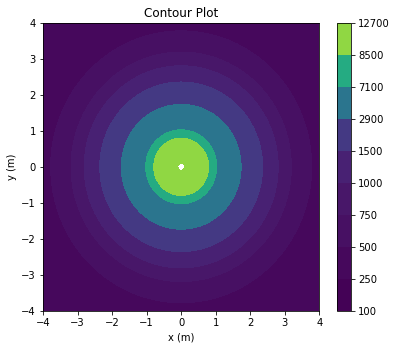

In [41]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(X, Y, Z_pred, levels = [100, 250, 500, 750, 1000, 1500, 2900, 7100, 8500, 12700], cmap = 'viridis')
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()

### Peak incident pressure contours

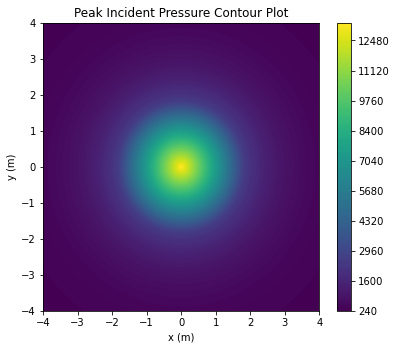

In [42]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(X, Y, Z_pred, levels = 200, cmap = 'viridis')
plt.colorbar(cp)

ax.set_title('Peak Incident Pressure Contour Plot')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()